In [3]:
from google.colab import drive
drive.mount('/content/drive');

Mounted at /content/drive


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
cd drive/MyDrive/PSOSM

/content/drive/MyDrive/PSOSM


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px
import plotly.graph_objects as gone
from textblob import TextBlob
from sklearn.ensemble import RandomForestRegressor
from scipy.interpolate import interp1d
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
import nltk
import pickle
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
# Q1

file = pd.read_csv("checkin.txt",sep="\t")
file.columns = ['userID','check_in_time','lat','long','loc_id']
filearr = file.to_numpy()


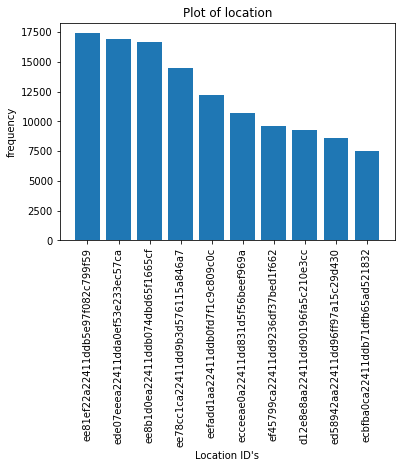

In [8]:
# a

ctloc=file['loc_id'].value_counts()[1:11]
locid=file['loc_id'].value_counts().index[1:11].to_numpy().astype("str")
#print(locid[0])
plt.bar(locid,ctloc)
plt.title("Plot of location")
plt.xlabel("Location ID's")
plt.ylabel("frequency")
plt.xticks(rotation=90)
plt.show()

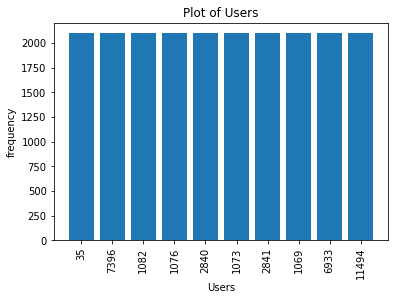

In [9]:
ctloc2=file['userID'].value_counts()[:10]
locid2=file['userID'].value_counts().index[:10].to_numpy().astype("str")

plt.bar(locid2,ctloc2)
plt.title("Plot of Users")
plt.xlabel("Users")
plt.ylabel("frequency")
plt.xticks(rotation=90)
plt.show()

In [10]:
# b heatmap

dic = {}
lg = []
lt = []
for i in filearr:
  if(i[4] in dic):
    dic[i[4]] = dic[i[4]]+1
  else:
    dic[i[4]] = 1
    lg.append(i[3])
    lt.append(i[2])
sort_orders = sorted(dic.items(), key=lambda x: x[1], reverse=True)
#print(len(sort_orders))
freql = []

for i in sort_orders:
  freql.append(i[1])
freql = freql[:100000]
lg = lg[:100000]
lt = lt[:100000]


In [12]:
df = pd.DataFrame()
lg = pd.Series(lg)
lt = pd.Series(lt)
freql1 = pd.Series(freql)
df = pd.concat([df,lt,lg,freql1],axis=1)
df.columns = ['latitude','longitude','freq']
m1=interp1d([1,max(freql)],[5,18])
rad1=m1(freql);
fig=px.density_mapbox(df,lat='latitude',lon='longitude', radius=rad1,zoom=0,mapbox_style='stamen-terrain');
fig.show()

In [13]:
# c
usertime = []
loctime = []
for i in filearr:
  if(i[0]==35):
    usertime.append(i[1])
  if(i[4]==locid[0]):
    loctime.append(i[1])

print(usertime)
print(loctime)

['2010-09-28T19:12:25Z', '2010-09-23T03:50:13Z', '2010-09-18T19:22:30Z', '2010-09-05T04:25:05Z', '2010-09-05T04:22:02Z', '2010-09-04T05:19:19Z', '2010-09-04T04:21:58Z', '2010-09-03T03:25:30Z', '2010-09-03T03:24:03Z', '2010-09-01T21:03:17Z', '2010-08-26T03:10:01Z', '2010-08-26T03:09:05Z', '2010-08-25T23:51:50Z', '2010-08-25T23:46:08Z', '2010-08-24T01:13:29Z', '2010-08-18T00:09:36Z', '2010-08-16T18:44:31Z', '2010-08-15T20:19:23Z', '2010-08-15T01:10:59Z', '2010-08-12T00:59:56Z', '2010-08-12T00:56:51Z', '2010-08-04T02:45:45Z', '2010-08-04T01:03:56Z', '2010-08-04T00:57:17Z', '2010-08-03T00:42:11Z', '2010-08-01T16:23:04Z', '2010-08-01T14:05:10Z', '2010-07-31T21:25:01Z', '2010-07-29T03:59:08Z', '2010-07-27T01:29:01Z', '2010-07-26T00:47:17Z', '2010-07-24T06:12:24Z', '2010-07-22T02:33:55Z', '2010-07-21T23:55:18Z', '2010-07-21T19:08:08Z', '2010-07-21T18:27:56Z', '2010-07-21T06:43:50Z', '2010-07-21T01:54:59Z', '2010-07-20T21:43:25Z', '2010-07-20T03:35:00Z', '2010-07-20T00:23:11Z', '2010-07-19T19:

In [14]:
array1 = pd.to_datetime(usertime).values
date = {}
for i in range(len(array1)):
  temp = pd.Timestamp(np.datetime64(array1[i]))
  temp = str(temp).split(" ")
 # print(temp[0]
  if(temp[0] in date):
    date[temp[0]] = date[temp[0]]+1
  else:
    date[temp[0]]=1
#print(date)
sort_orders = sorted(date.items(), key=lambda x: x[0], reverse=False)
print(sort_orders)
freq = []
day = []
for i in sort_orders:
  day.append(i[0])
  freq.append(i[1])
figure = gone.Figure([gone.Scatter(x=day, y=freq)])
figure.show()

[('2009-02-27', 4), ('2009-02-28', 6), ('2009-03-01', 4), ('2009-03-02', 6), ('2009-03-03', 4), ('2009-03-04', 4), ('2009-03-05', 6), ('2009-03-06', 8), ('2009-03-07', 10), ('2009-03-08', 2), ('2009-03-09', 1), ('2009-03-10', 7), ('2009-03-11', 10), ('2009-03-12', 11), ('2009-03-13', 8), ('2009-03-14', 2), ('2009-03-15', 1), ('2009-03-16', 4), ('2009-03-17', 11), ('2009-03-18', 3), ('2009-03-19', 7), ('2009-03-20', 5), ('2009-03-22', 2), ('2009-03-23', 2), ('2009-03-24', 1), ('2009-03-25', 4), ('2009-03-26', 6), ('2009-03-27', 4), ('2009-03-28', 2), ('2009-03-30', 6), ('2009-03-31', 6), ('2009-04-01', 7), ('2009-04-02', 4), ('2009-04-03', 2), ('2009-04-04', 9), ('2009-04-06', 6), ('2009-04-07', 4), ('2009-04-08', 13), ('2009-04-09', 13), ('2009-04-10', 15), ('2009-04-11', 12), ('2009-04-12', 6), ('2009-04-13', 2), ('2009-04-14', 7), ('2009-04-15', 14), ('2009-04-16', 7), ('2009-04-17', 6), ('2009-04-18', 1), ('2009-04-19', 5), ('2009-04-20', 9), ('2009-04-21', 10), ('2009-04-22', 6), (

In [15]:
array1 = pd.to_datetime(loctime).values
date = {}
for i in range(len(array1)):
  temp = pd.Timestamp(np.datetime64(array1[i]))
  temp = str(temp).split(" ")
 # print(temp[0]
  if(temp[0] in date):
    date[temp[0]] = date[temp[0]]+1
  else:
    date[temp[0]]=1
#print(date)
sort_orders = sorted(date.items(), key=lambda x: x[0], reverse=False)
print(sort_orders)
freq = []
day = []
for i in sort_orders:
  day.append(i[0])
  freq.append(i[1])
figure = gone.Figure([gone.Scatter(x=day, y=freq)])
figure.show()

[('2008-04-14', 1), ('2008-04-16', 1), ('2008-04-18', 2), ('2008-04-19', 2), ('2008-04-20', 1), ('2008-04-21', 2), ('2008-04-22', 4), ('2008-04-23', 1), ('2008-04-24', 4), ('2008-04-25', 9), ('2008-04-26', 2), ('2008-04-27', 4), ('2008-04-28', 12), ('2008-04-29', 11), ('2008-04-30', 23), ('2008-05-01', 15), ('2008-05-02', 20), ('2008-05-03', 30), ('2008-05-04', 13), ('2008-05-05', 40), ('2008-05-06', 66), ('2008-05-07', 77), ('2008-05-08', 63), ('2008-05-09', 59), ('2008-05-10', 67), ('2008-05-11', 44), ('2008-05-12', 42), ('2008-05-13', 48), ('2008-05-14', 43), ('2008-05-15', 54), ('2008-05-16', 61), ('2008-05-17', 56), ('2008-05-18', 53), ('2008-05-19', 47), ('2008-05-20', 34), ('2008-05-21', 45), ('2008-05-22', 49), ('2008-05-23', 42), ('2008-05-24', 42), ('2008-05-25', 29), ('2008-05-26', 37), ('2008-05-27', 41), ('2008-05-28', 92), ('2008-05-29', 54), ('2008-05-30', 44), ('2008-05-31', 47), ('2008-06-01', 52), ('2008-06-02', 29), ('2008-06-03', 37), ('2008-06-04', 47), ('2008-06-0